# Notebook for the model inference

## 1. Imports

In [1]:
import os
import glob
import sys
from pathlib import Path

import PIL.Image

# plots and images
import matplotlib.pyplot as plt

# Pytorch
import torch

In [2]:
# If we want to use Google Drive
_USE_G_DRIVE = False

In [3]:
# Mount google drive
base_path = "../"
if _USE_G_DRIVE:
  from google.colab import drive

  drive.mount("/content/drive/")
  base_path = Path('/content/drive/My Drive/Bridges-Crack-Detection/')
  sys.path.append(str(base_path))

# import our src package
sys.path.append(str("../"))
sys.path.append(str("../src/"))

#### Import model and utility functions

In [4]:
from src.utils.utils import init_random, get_device
from src.utils.model import get_model
from src.utils.trainer import inference

## 2. Variables definition

### General Variables

In [5]:
# Path for the images we want to classify
DS_PATH = os.path.join(base_path, "Dataset/Test/")
#------------------------------------------------
# Saved model path
MODEL_SAVE_PATH= os.path.join(base_path, "SavedWeights/trained_model.pt")
#------------------------------------------------

print("----- Paths -----")
print("Path Dataset To Classify:", str(DS_PATH))
print("Path Model Params:", str(MODEL_SAVE_PATH))

----- Paths -----
Path Dataset To Classify: ../Dataset/Test/
Path Model Params: ../SavedWeights/trained_model.pt


### Initialization

In [6]:
# set deterministic to true to have deterministic results, set it to false to have faster inference
deterministic_behaviour = False
seed = 6788
init_random(deterministic_behaviour, seed)
device = get_device()

## 3. Load the model

In [7]:
# Load the model into the device
model = get_model(device, verbose=True)
# Load trained weights
model.load_state_dict(torch.load(MODEL_SAVE_PATH))
# Set the model to evaluation mode
model.eval()
print("Model Loaded")

----- ConcreteModel ----
New Classifier Stats: 
Input features 1° Linear:  512
Input features 2° Linear:  256
Input features 3° Linear:  85
Output 3° Linear:  2
------------------------
Model Loaded


## 4. Inference phase

### Prepare inference data

In [8]:
# Load the dataset
data_to_predict = [o for o in glob.glob(os.path.join(DS_PATH, "*"))]
#-------------------------------------------------------

print("Number of images to classify:", len(data_to_predict))

Number of images to classify: 2


### Prediction method

In [9]:
def predict_image(model, path, device):
  img = PIL.Image.open(path)
  output = inference(model, path, device)
  return img, output

### Print images and their relative predictions

Loaded image: ../Dataset/Test\test_crack.jpeg
The image was classified as: Crack

Loaded image: ../Dataset/Test\test_normal.jpeg
The image was classified as: Normal



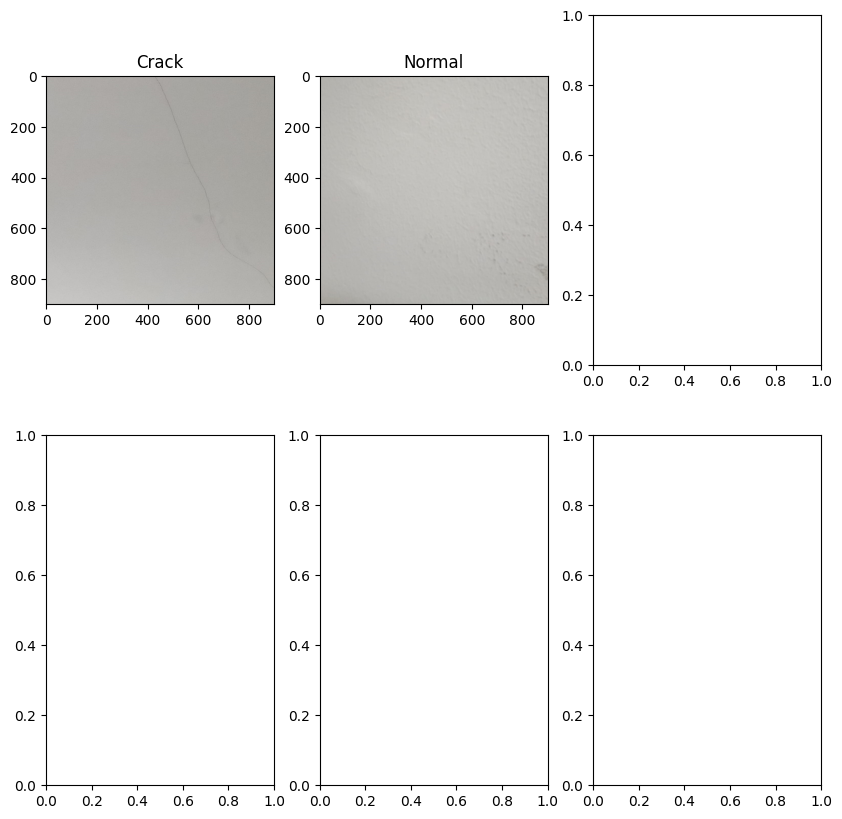

In [10]:
# Set number of plots to show
N_ROWS = 2 # Must be > 1
N_COLUMNS = 3 # Must be > 1
N_IMAGES_TO_PLOT = N_ROWS * N_COLUMNS
# If we have more images only N_IMAGES_TO_PLOT will be shown, for the others we will have only the print

plots_height = 10
plots_width = 10

fig,a = plt.subplots(N_ROWS, N_COLUMNS)
fig.set_figheight(plots_height)
fig.set_figwidth(plots_width)

i = j = 0
cont = 0
for img_path in data_to_predict:
  output_image, result = predict_image(model, img_path, device)
  result = "Normal" if result == 0 else "Crack" if result == 1 else "Spalling"
  print(f"The image was classified as: {result}\n")
  if cont < N_IMAGES_TO_PLOT:
    a[i][j].imshow(output_image)
    a[i][j].set_title(result)
    j += 1
    if j == N_COLUMNS:
      j = 0
      i += 1
  cont += 1